In [121]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np
from sklearn import preprocessing
pd.options.display.max_columns = None

df = pd.read_csv(r'../Datasets/training-dataset-reduced.csv')
df = df[df.filter(regex='^(?!Unnamed)').columns] #deleting unwanted column added 

X = df.values[:,0:40]
Y = df.values[:,40]


from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors as nb



# FEATURE SELECTION: Irrelevant columns

In [122]:

# Original knn // when adding this to the knn notebook this can be deleted
cv = StratifiedKFold(n_splits=10) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=Y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)




c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.7106669638153897

In [123]:
nrcols=40
col = np.random.random(size=(X.shape[0],nrcols))
scaler = preprocessing.StandardScaler().fit(col)
irrelevant=scaler.transform(col)
for i in range(nrcols):
    print('std:',irrelevant[:,i].std(),'min',irrelevant[:,i].min(),'max',irrelevant[:,i].max())

std: 1.0 min -1.7487480896980654 max 1.7300678094893214
std: 0.9999999999999999 min -1.7540948452628438 max 1.7345196967603487
std: 1.0000000000000002 min -1.73307930012768 max 1.7433282668406846
std: 1.0000000000000004 min -1.725869825205778 max 1.7589265104144325
std: 1.0000000000000009 min -1.7425864494886831 max 1.7319350701672525
std: 1.0000000000000004 min -1.7256270829460911 max 1.7211721109186726
std: 0.9999999999999991 min -1.7340280624781685 max 1.7205631280528384
std: 1.0000000000000007 min -1.7400298701352659 max 1.7233879132362175
std: 1.0000000000000004 min -1.7190760654233048 max 1.7322170970174742
std: 1.0000000000000002 min -1.7368015194382709 max 1.7302413786222164
std: 0.9999999999999996 min -1.7386143874918405 max 1.7588566181651737
std: 1.0000000000000007 min -1.7054062966171548 max 1.7283888330986896
std: 1.0000000000000018 min -1.7206780592762205 max 1.7247901842173878
std: 0.9999999999999983 min -1.7206188884809828 max 1.7184281020677776
std: 0.9999999999999996 

In [124]:
X2=np.hstack((X,irrelevant))

cv = StratifiedKFold(n_splits=10) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2, y=Y,cv=cv, scoring='accuracy')  
print(np.mean(cv_scores))

params = {'n_neighbors':list(range(1,20,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X2, Y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.5846689267978624
Best Params= {'n_neighbors': 17, 'weights': 'distance'} Accuracy= 0.6214219466843154


# Feature Selection: Ranking

There are columns that, by them selves may be irrelevant but, when paired with other features become relevant. To prevent removing columns that by them selves are irrelevant but that grouped with other columns can become very relevant to predict our final feature, we can use Ranking.

When doing ranking we have to select k best features and then fit the whole data set taking into account the irrelevant features found previously. To find the best k value, we can plot the scores obtained for eeach possible k value and then see with which k the score measure is better.

In [125]:
X2.shape

(6667, 80)

c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

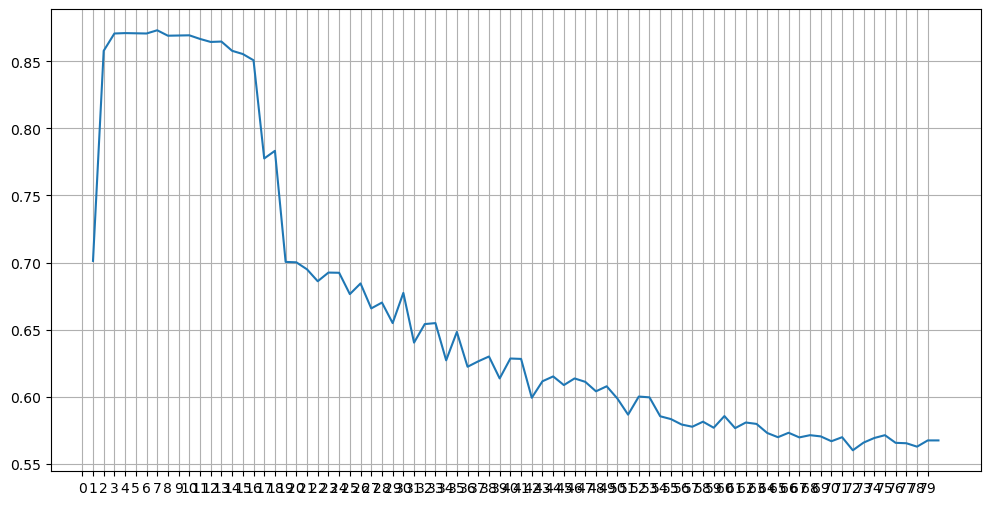

In [126]:


original = np.zeros(80)
for i in range(80):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, Y)
    cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True) 
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=Y, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)
    
from matplotlib.pyplot import figure
fig = figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(np.arange(0, 80, step=1))
plt.plot(range(1,81),original)
plt.show()

In [129]:
X_reduced = SelectKBest(mutual_info_classif, k=8).fit_transform(X2, Y)
cv = StratifiedKFold(n_splits=10) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=Y, cv=cv, scoring='accuracy')  
print(np.mean(cv_scores))

cv = StratifiedKFold(n_splits=10) 
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_reduced, Y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)


c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Marina\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.8696532364448407
Best Params= {'n_neighbors': 9, 'weights': 'uniform'} Accuracy= 0.8780551165858512
